# Classification Project

## File IO

Only File IO...

You may not change this code.

In [1]:
# Base Module of data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [2]:
from tkinter.filedialog import askopenfilename
import pandas as pd
import tkinter
import os

# tk_window = tkinter.Tk()
# cwd = os.getcwd()

# tr_data = pd.read_csv(askopenfilename(title='Choose your training data'))

# tr_ans = pd.read_csv(askopenfilename(title='Choose your training answer'))

# tr_ans = tr_ans.iloc[:, 0]

# ts_data = pd.read_csv(askopenfilename(title='Choose your test data'))

# tk_window.destroy()

# data_path = ['../../13week_project_data/Wine_Quality_Data']
# x_file_path = os.sep.join(data_path + ['data.csv'])
# x_data = pd.read_csv(x_file_path)

# y_file_path = os.sep.join(data_path + ['answer.csv'])
# y_data = pd.read_csv(y_file_path)

# y_data = y_data.iloc[:, 0]

# # drop columns
# x_data.drop(['quality'], axis=1, inplace=True)

# from sklearn.model_selection import train_test_split
# # Split as train data and test data
# tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.999, shuffle=True)

In [3]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [4]:
data_path2 = ['../../data']
file_path = os.sep.join(data_path2 + ['Wine_Quality_Data.csv'])
data = pd.read_csv(file_path)

original_data=data.copy()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove extraneous columns
# data.drop(['free_sulfur_dioxide', 'residual_sugar', 'fixed_acidity',  'alcohol', 'quality',
#            'pH', 'sulphates', 'citric_acid', 'volatile_acidity', 'chlorides', 'density'], 
#           axis=1, inplace=True)
data.drop(['quality'], axis=1, inplace=True)


# plt.figure()
# sns.pairplot(data, hue = "color")
# plt.show().plt.figure()
# dataset.boxplot(by="color", figsize=(15, 10))
# plt.show()

# plt.figure()
# data.boxplot(by="color", figsize=(15, 10))
# plt.show()

from subprocess import check_output

data.describe()

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

data['color'] = lb.fit_transform(data['color'])

In [5]:
pd.value_counts(data['color'].values.ravel())

1    4898
0    1599
dtype: int64

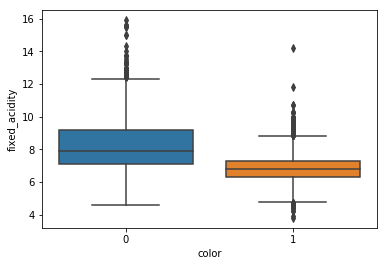

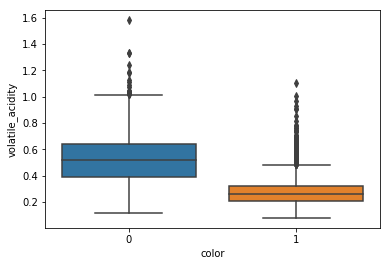

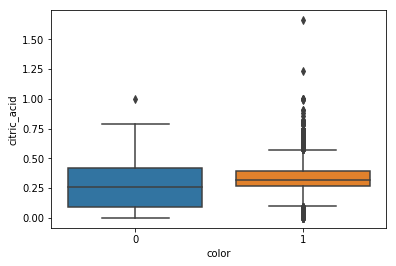

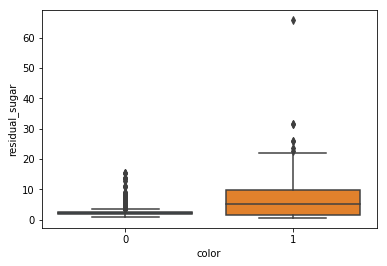

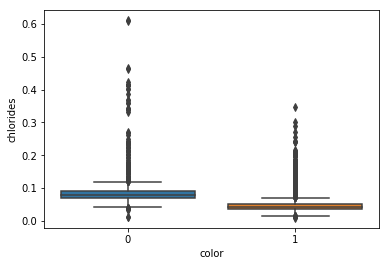

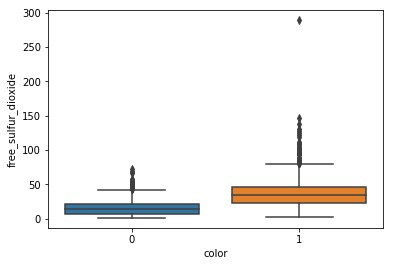

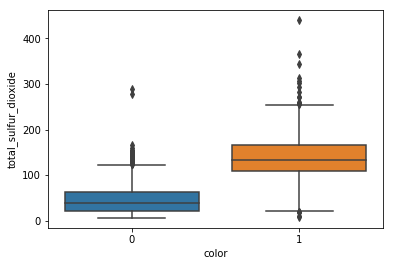

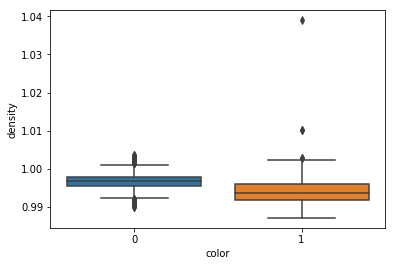

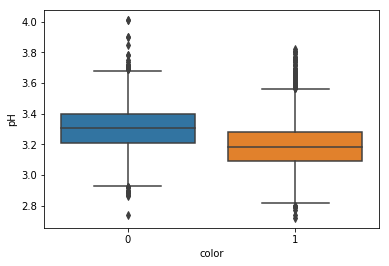

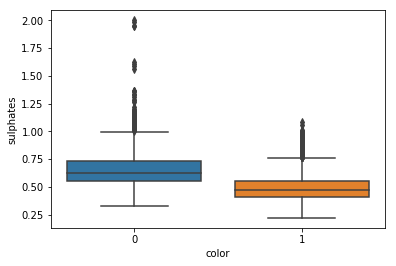

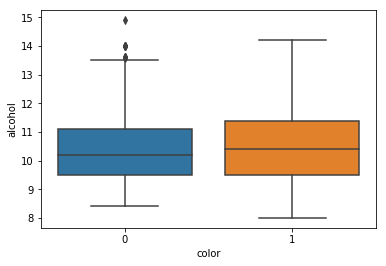

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = data.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='color', y=feature_names[i], data=data)

In [7]:
df = data.copy(deep=True)

types = df['color'].unique()
d = {type: df[df['color'] == type] for type in types}

d[1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
1599,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1600,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
1601,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
1602,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
1603,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
1604,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
1605,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,1
1606,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1607,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
1608,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,1


In [8]:
low = .25
high = .75

bounds = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'color']
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:]- quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
    bounds[type] = quant_df
    
bounds[1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0.25,4.8,0.045,0.09,-10.6,0.015,-11.5,19.5,0.985156,2.805,0.20,6.65
0.75,8.8,0.485,0.57,22.2,0.071,80.5,255.5,1.002666,3.565,0.76,14.25


In [9]:
filt_df = d[1].loc[:, d[1].columns != 'color'] # Remove 'Type' Column
filt_df = filt_df.apply(lambda x: x[(x>bounds[1].loc[low,x.name]) & (x < bounds[1].loc[high,x.name])], axis=0)
filt_df = pd.concat([filt_df,d[1].loc[:,'color']], axis=1)

filt_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
1599,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1600,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
1601,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
1602,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
1603,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
1604,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
1605,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,1
1606,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1607,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
1608,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,1


In [10]:
df_new = {}

for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'color'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[type].loc[low,x.name]) & (x < bounds[type].loc[high,x.name])], axis=0)
    df_new[type] = pd.concat([filt_df,d[type].loc[:,'color']], axis=1)


data_new = result = pd.concat(df_new)
data_new

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0 0               7.4             0.700         0.00            1.90   
  1               7.8             0.880         0.00            2.60   
  2               7.8             0.760         0.04            2.30   
  3              11.2             0.280         0.56            1.90   
  4               7.4             0.700         0.00            1.90   
  5               7.4             0.660         0.00            1.80   
  6               7.9             0.600         0.06            1.60   
  7               7.3             0.650         0.00            1.20   
  8               7.8             0.580         0.02            2.00   
  9               7.5             0.500         0.36             NaN   
  10              6.7             0.580         0.08            1.80   
  11              7.5             0.500         0.36             NaN   
  12              5.6             0.615         0.00            1.60   
  13              7.8             0.610         0.29            1.60   
  14              8.9             0.620         0.18             NaN   
  15              8.9             0.620         0.19             NaN   
  16              8.5             0.280         0.56            1.80   
  17              8.1             0.560         0.28            1.70   
  18              7.4             0.590         0.08             NaN   
  19              7.9             0.320         0.51            1.80   
  20              8.9             0.220         0.48            1.80   
  21              7.6             0.390         0.31            2.30   
  22              7.9             0.430         0.21            1.60   
  23              8.5             0.490         0.11            2.30   
  24              6.9             0.400         0.14            2.40   
  25              6.3             0.390         0.16            1.40   
  26              7.6             0.410         0.24            1.80   
  27              7.9             0.430         0.21            1.60   
  28              7.1             0.710         0.00            1.90   
  29              7.8             0.645         0.00            2.00   
...               ...               ...          ...             ...   
1 6467            5.8             0.230         0.31            4.50   
  6468            6.6             0.240         0.33           10.10   
  6469            6.1             0.320         0.28            6.60   
  6470            5.0             0.200         0.40            1.90   
  6471            6.0             0.420         0.41           12.40   
  6472            5.7             0.210         0.32            1.60   
  6473            5.6             0.200         0.36            2.50   
  6474            7.4             0.220         0.26            1.20   
  6475            6.2             0.380         0.42            2.50   
  6476            5.9               NaN          NaN            0.80   
  6477            6.2               NaN          NaN            0.90   
  6478            6.6             0.340         0.40            8.10   
  6479            6.6             0.340         0.40            8.10   
  6480            5.0             0.235         0.27           11.75   
  6481            5.5             0.320         0.13            1.30   
  6482            4.9             0.470         0.17            1.90   
  6483            6.5             0.330         0.38            8.30   
  6484            6.6             0.340         0.40            8.10   
  6485            6.2             0.210         0.28            5.70   
  6486            6.2             0.410         0.22            1.90   
  6487            6.8             0.220         0.36            1.20   
  6488            4.9             0.235         0.27           11.75   
  6489            6.1             0.340         0.29            2.20   
  6490            5.7             0.210         

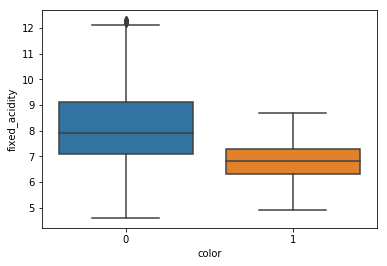

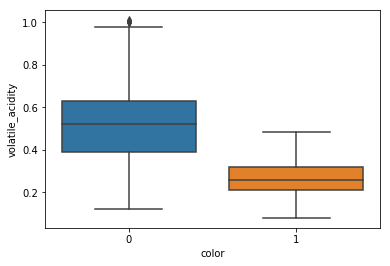

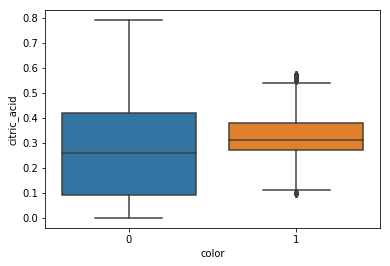

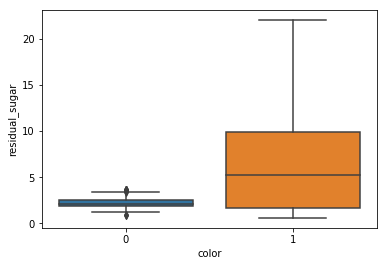

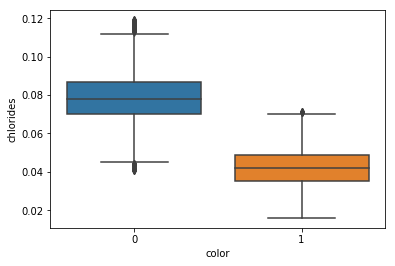

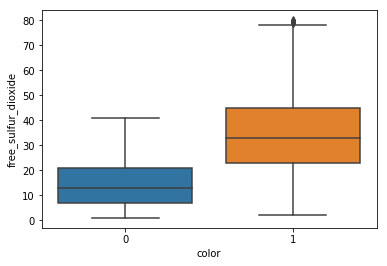

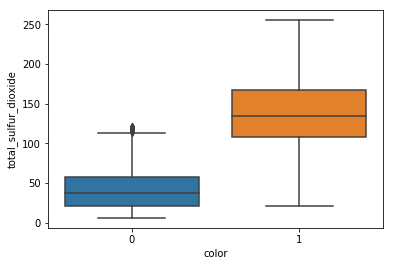

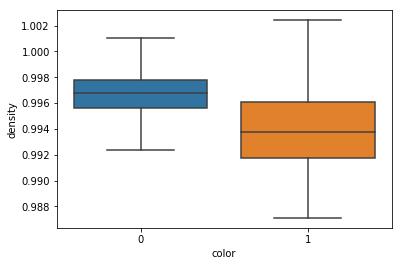

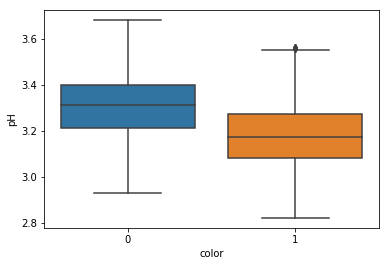

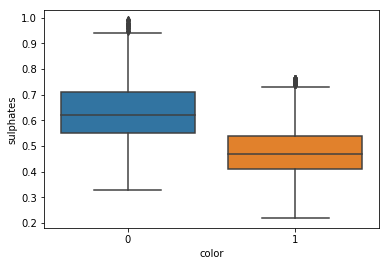

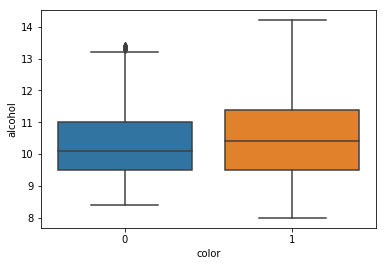

In [11]:
# Now we have our glass data that has all outliers removed
# Check out the boxplot again

for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='color', y=feature_names[i], data=data_new)

In [12]:
# types = np.unique(train['color'])

# for i in range(len(types)):
#     fig = plt.figure()
#     average = data_new[[data_new.columns[i], "color"]].groupby(['color'],as_index=False).mean()
#     sns.barplot(x = 'color', y = data_new.columns[i], data= average)

In [13]:
data[data['color'] == 1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
1599,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1600,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
1601,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
1602,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
1603,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,1
1604,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,1
1605,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,1
1606,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,1
1607,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,1
1608,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,1


In [14]:
data[data['color'] == 0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0


In [15]:
# data with outliers removed 
data.head()
y_data = data['color']
x_data = data.drop(data.columns[len(data.columns)-1], axis=1)

from sklearn.model_selection import train_test_split
# Split as train data and test data
tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.5, shuffle=True)


# original data
# original_data['color'] = lb.fit_transform(original_data['color'])

# y_data = original_data['color']
# x_data = data.drop(data.columns[len(data.columns)-1],axis=1)

# from sklearn.model_selection import train_test_split
# # Split as train data and test data
# tr_data, ts_data, tr_ans, ts_ans = train_test_split(x_data, y_data, test_size=0.5, shuffle=True)

## Predict Algorithm

Type your source code (Champion Algorithm)

F-Score: 0.991
Accuracy:  0.9907663896583564
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       819
          1       0.99      0.99      0.99      2430

avg / total       0.99      0.99      0.99      3249



C:\Users\Susan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


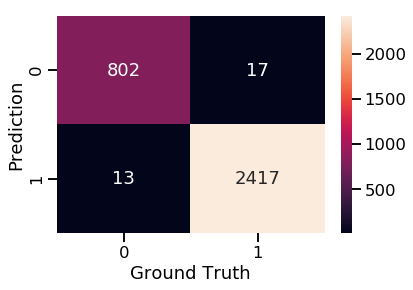

In [16]:
# data_df = pd.DataFrame(ts_data)
# data_df.to_csv("Iris_ts_data.csv", mode='w')
# ans_df = pd.DataFrame(ts_ans)
# ans_df.to_csv("Iris_ts_ans.csv", mode='w')

# # KNN, neighbors=5
# from sklearn.neighbors import KNeighborsClassifier
# KNN = KNeighborsClassifier(n_neighbors=5)
# KNN = KNN.fit(tr_data, tr_ans)
# y_pred = KNN.predict(ts_data)

# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_KNN5.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # GNB
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb = gnb.fit(tr_data, tr_ans)
# y_pred = gnb.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_GNB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))
               
# # SVM
# from sklearn.svm import LinearSVC
# LinSVC = LinearSVC()
# LinSVC = LinSVC.fit(tr_data, tr_ans)
# y_pred = LinSVC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_SVM.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# Bagging
# from sklearn.ensemble import BaggingClassifier
# BC = BaggingClassifier(n_estimators=50)
# BC = BC.fit(tr_data, tr_ans)
# y_pred = BC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_Bagging.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF = RF.fit(tr_data, tr_ans)
y_pred = RF.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_RF.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # GradientBoosting
# from sklearn.ensemble import GradientBoostingClassifier
# GBC = GradientBoostingClassifier()
# GBC = GBC.fit(tr_data, tr_ans)
# y_pred = GBC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_GB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# # AdaBoosting
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# ABC = AdaBoostClassifier()
# ABC = ABC.fit(tr_data, tr_ans)
# y_pred = ABC.predict(ts_data)
               
# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("Iris_AB.csv", mode='w')
# print(accuracy(ts_ans, y_pred))

# pred_df = pd.DataFrame(y_pred)
# pred_df.to_csv("output.csv", mode='w')

# End of Demo


p,r,f,s = precision_recall_fscore_support(ts_ans, y_pred, average='micro')
print("F-Score:", round(f,3))
print("Accuracy: ", accuracy_score(ts_ans, y_pred))

print(classification_report(ts_ans, y_pred))

labels = sorted(ts_ans.unique())
chart = pd.DataFrame(confusion_matrix(ts_ans, y_pred),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(chart, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

## Check Accuracy

Only for check accuracy

In [17]:
# def accuracy(real, predict):
#     return sum(real == predict) / float(real.shape[0])

# tk_window = tkinter.Tk()
# cwd = os.getcwd()
# ts_ans = pd.read_csv(askopenfilename(title='Choose your test answer'))
# ts_ans = ts_ans.iloc[:, 0]
# tk_window.destroy()

print(accuracy(ts_ans, y_pred))

0.9907663896583564
